BA 890 Professor Roy

Lyushen Song

Date: August 9th, 2024

## **Predicting Housing Prices in King County: A Comparative Analysis of Machine Learning Models**




# Load Dataset through Kaggle and EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# Set Kaggle credentials
os.environ['KAGGLE_USERNAME'] = 'lyushenabrahamsong'
os.environ['KAGGLE_KEY'] = '54d91311e81917c34a56f1c1c986270b'

import kaggle

# Download the dataset
kaggle.api.dataset_download_files('harlfoxem/housesalesprediction', path='.', unzip=True)

# Load the dataset into a pandas DataFrame
df = pd.read_csv('kc_house_data.csv')

df.head()

2024-08-11 18:14:25,513 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/harlfoxem/housesalesprediction?datasetVersionNumber=None


Dataset URL: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<ipython-input-38-b75ae0839fe6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'${x/1e6:.1f}M' for x in current_values])


<Figure size 1200x800 with 0 Axes>

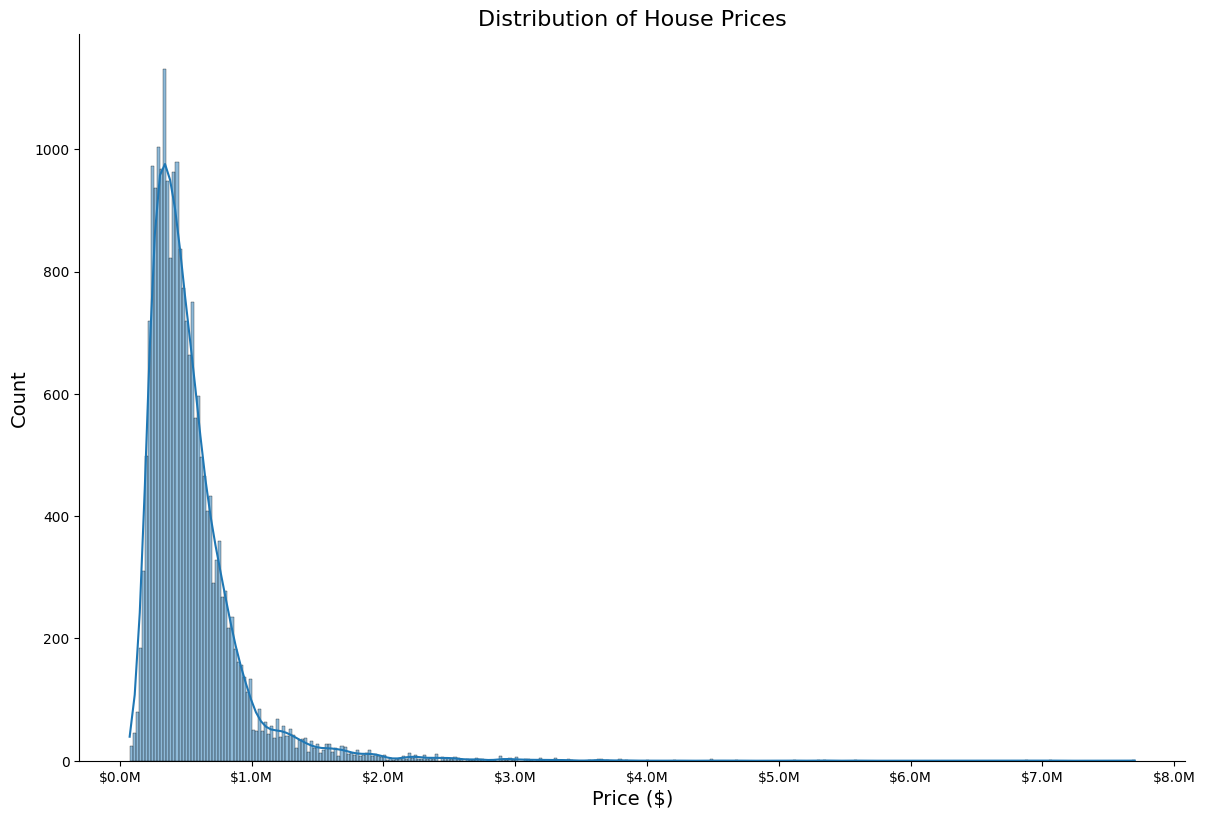

In [ ]:
plt.figure(figsize=(12, 8))
sns.displot(data=df, x='price', kde=True, height=8, aspect=1.5)
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Make x-axis labels to show prices in millions
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'${x/1e6:.1f}M' for x in current_values])

plt.show()

As the chart shows that most hosues were sold betwween 0 to 1million dollars and the average houses sold were around 500k.

# Feature Engieering


In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create the year sold variables
df['year_sold'] = df['date'].dt.year

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

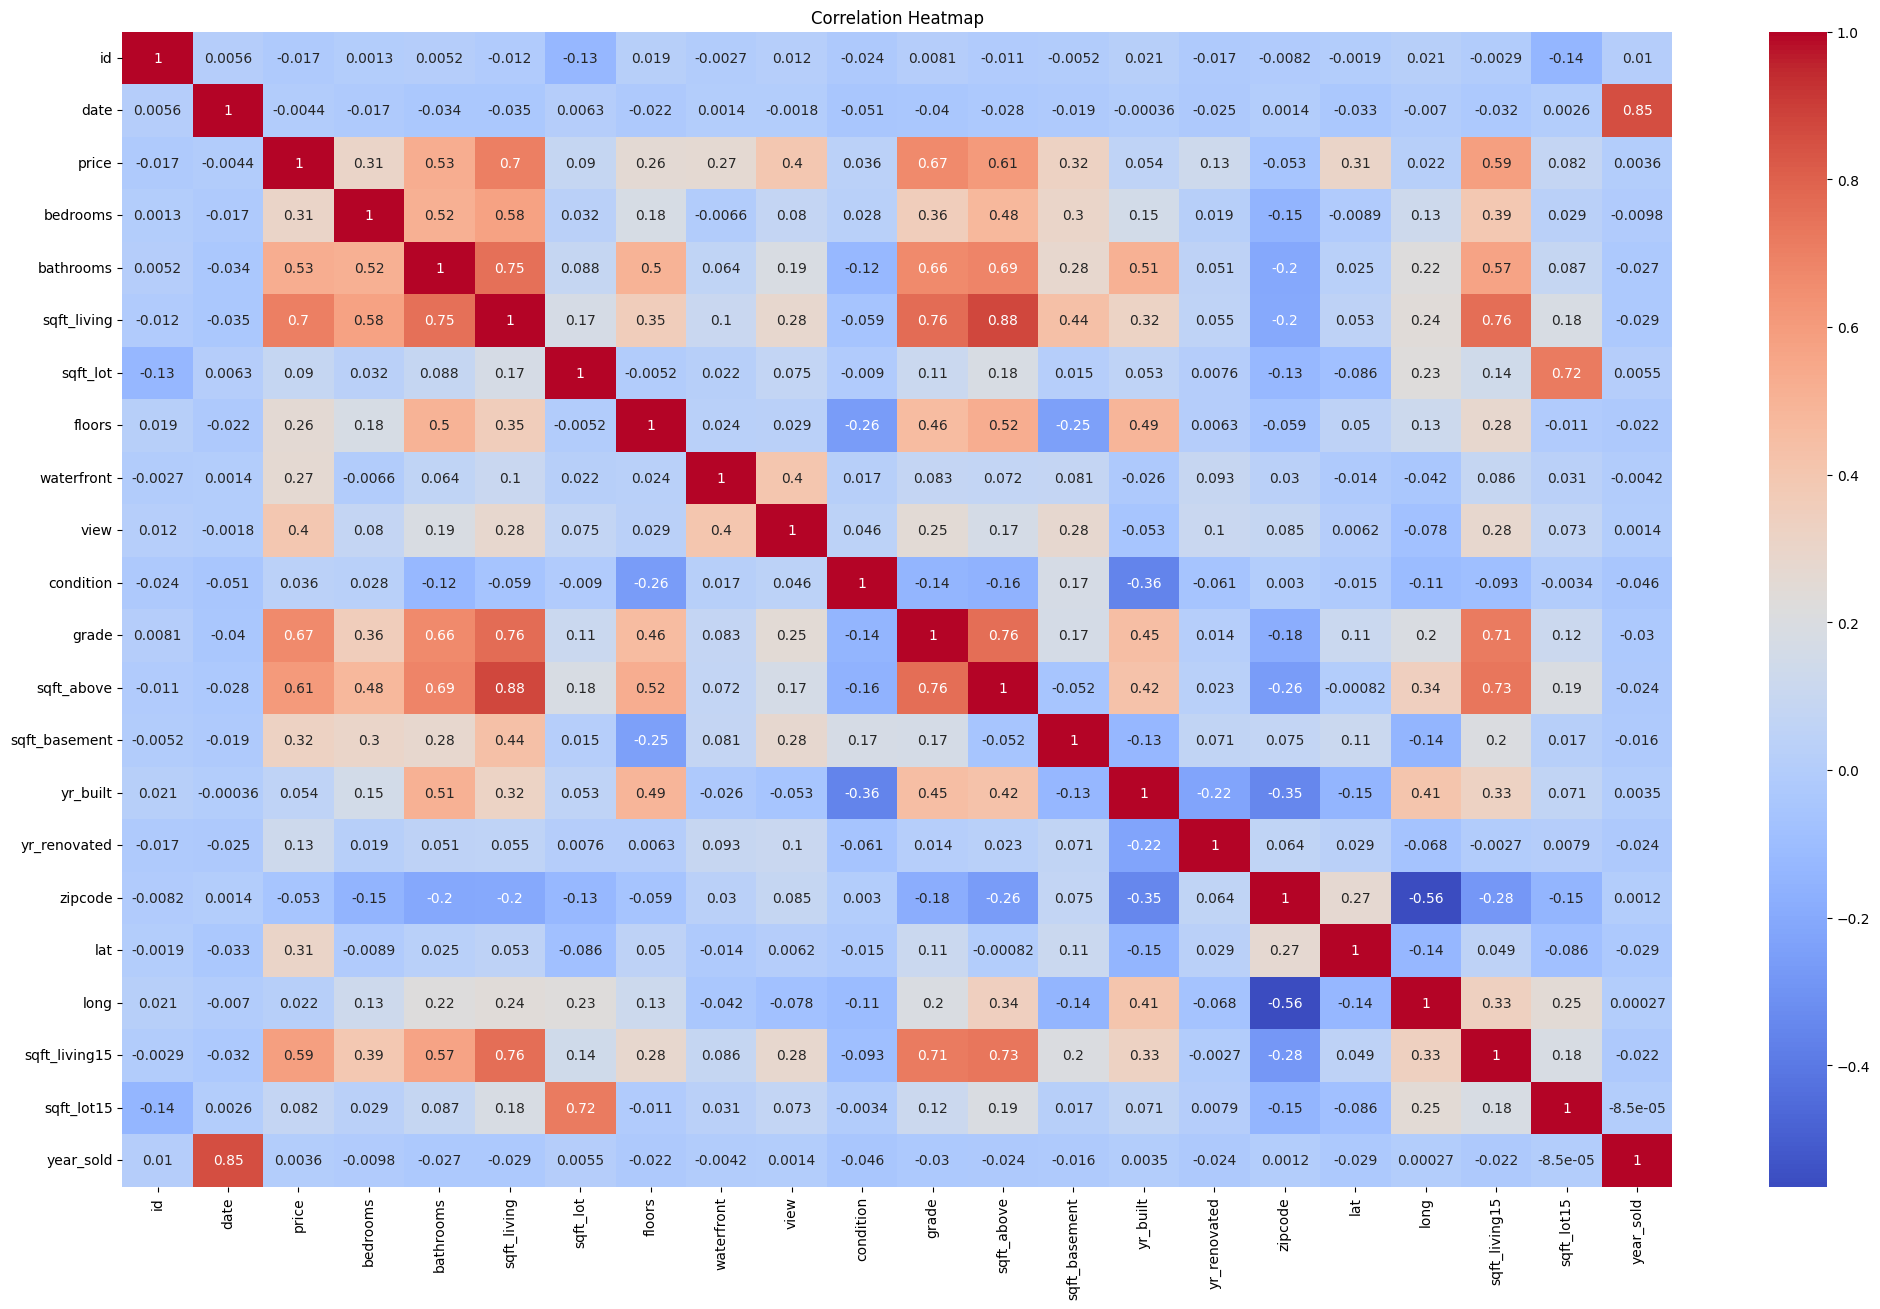

In [ ]:
plt.figure(figsize=(25, 15))

# Plot the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

Based on the Correlation heatmap, sqft_living15, grade, sqft_basement,view, waterfront, bedrooms, bathrooms shown some correlation with the target vairable, price.

In [ ]:
# Create Total square footage
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']

# Create House Age
df['house_age'] = df['year_sold'] - df['yr_built']

# Create Renovated: Binary feature indicating if the house has been renovated
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)



create total_sqft, house_age, is_rennovated variables for better machine learning predictions.

In [ ]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [ ]:
print(len(df['zipcode'].unique()))

70


In [ ]:
sales_by_zipcode = df['zipcode'].value_counts().reset_index()
sales_by_zipcode.columns = ['zipcode', 'num_sales']

# Sort by number of sales in descending order
sales_by_zipcode = sales_by_zipcode.sort_values('num_sales', ascending=False)
print(sales_by_zipcode)

    zipcode  num_sales
0     98103        602
1     98038        590
2     98115        583
3     98052        574
4     98117        553
..      ...        ...
65    98102        105
66    98010        100
67    98024         81
68    98148         57
69    98039         50

[70 rows x 2 columns]


There are 70 zipcodes in total, and all of zipcodes have decent number of sales, therefore, I can't just simply drop them in roder to reduce diemensions for the MLP. I decided to convert them into towns from their specific zipcodes.

In [ ]:
df_cleaned= df.copy()

In [ ]:
df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,total_sqft,house_age,is_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,6830,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,9812,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,10770,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,6960,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,9760,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,2014,2661,5,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,2015,8123,1,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,2014,2370,5,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,2015,3988,11,0


In [ ]:
# convert zipcodes to cities/towns
zipcode_to_city = {
    '98001': 'Auburn', '98002': 'Auburn', '98003': 'Federal Way', '98004': 'Bellevue',
    '98005': 'Bellevue', '98006': 'Bellevue', '98007': 'Bellevue', '98008': 'Bellevue',
    '98010': 'Black Diamond', '98011': 'Bothell', '98014': 'Carnation', '98019': 'Duvall',
    '98022': 'Enumclaw', '98023': 'Federal Way', '98024': 'Fall City', '98027': 'Issaquah',
    '98028': 'Kenmore', '98029': 'Issaquah', '98030': 'Kent', '98031': 'Kent', '98032': 'Kent',
    '98033': 'Kirkland', '98034': 'Kirkland', '98038': 'Maple Valley', '98039': 'Medina',
    '98040': 'Mercer Island', '98042': 'Kent', '98045': 'North Bend', '98052': 'Redmond',
    '98053': 'Redmond', '98055': 'Renton', '98056': 'Renton', '98058': 'Renton', '98059': 'Renton',
    '98065': 'Snoqualmie', '98070': 'Vashon', '98072': 'Woodinville', '98074': 'Sammamish',
    '98075': 'Sammamish', '98077': 'Woodinville', '98092': 'Auburn', '98102': 'Seattle',
    '98103': 'Seattle', '98105': 'Seattle', '98106': 'Seattle', '98107': 'Seattle',
    '98108': 'Seattle', '98109': 'Seattle', '98112': 'Seattle', '98115': 'Seattle',
    '98116': 'Seattle', '98117': 'Seattle', '98118': 'Seattle', '98119': 'Seattle',
    '98122': 'Seattle', '98125': 'Seattle', '98126': 'Seattle', '98133': 'Seattle',
    '98136': 'Seattle', '98144': 'Seattle', '98146': 'Seattle', '98148': 'Seatac',
    '98155': 'Shoreline', '98166': 'Burien', '98168': 'Tukwila', '98177': 'Shoreline',
    '98178': 'Skyway', '98188': 'Tukwila', '98198': 'Des Moines', '98199': 'Seattle'
}

# Convert zipcodes to strings
df_cleaned['zipcode'] = df_cleaned['zipcode'].astype(str)

# Use the mapping to create a new column called city
df_cleaned['city'] = df_cleaned['zipcode'].map(zipcode_to_city)

In [ ]:
#check if there is null for the new city column
df_cleaned['city'].isnull().sum()

0

In [ ]:
df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,total_sqft,house_age,is_renovated,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,6830,59,0,Skyway
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,9812,63,1,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,10770,82,0,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,6960,49,0,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,9760,28,0,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,2014,2661,5,0,Seattle
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,2015,8123,1,0,Seattle
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,2014,2370,5,0,Seattle
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,2015,3988,11,0,Issaquah


In [ ]:
df_cleaned.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'total_sqft',
       'house_age', 'is_renovated', 'city'],
      dtype='object')

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Select only the numeric columns
X = df_cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
         'sqft_living15', 'sqft_lot15', 'total_sqft',
        'house_age']]


# Add a constant
X = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_sorted = vif.sort_values(by="VIF", ascending=False)

# print results
print(vif_sorted)


        Variable        VIF
3    sqft_living        inf
4       sqft_lot        inf
8     total_sqft        inf
0          const  40.836690
2      bathrooms   3.158765
6  sqft_living15   2.419399
7     sqft_lot15   2.109604
1       bedrooms   1.580536
9      house_age   1.562688
5         floors   1.502601


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Besides constant, sqft_living, sqft_lot, total_sqft have high VIF number that is greater than 5, therefore, I want to drop sqft_living, sqft_lot in the next step and keep total_sqft as it represent both sqft_living and sqft_lot.

In [ ]:
#get dummies to convert cateogrical columns
df_encoded = pd.get_dummies(df_cleaned, columns=['waterfront', 'view',
'condition', 'grade', 'city'], drop_first=True)
# 2. Drop unnecessary columns
columns_to_drop = ['id', 'date', 'yr_built', 'yr_renovated', 'year_sold', 'zipcode','sqft_living','sqft_lot']
df_encoded = df_encoded.drop(columns=columns_to_drop).reset_index(drop=True)

I dropped unnecessary columns and columns that are shown in VIF chart that have high VIF number, except total_sqft as it represent both sqft_lot and sqft_living. So I kept the total_sqft variable and did not drop it.

In [ ]:
df_encoded

,price,bedrooms,bathrooms,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,city_Renton,city_Sammamish,city_Seatac,city_Seattle,city_Shoreline,city_Skyway,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville
0,221900.0,3,1.00,1.0,1180,0,47.5112,-122.257,1340,5650,...,False,False,False,False,False,True,False,False,False,False
1,538000.0,3,2.25,2.0,2170,400,47.7210,-122.319,1690,7639,...,False,False,False,True,False,False,False,False,False,False
2,180000.0,2,1.00,1.0,770,0,47.7379,-122.233,2720,8062,...,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,1.0,1050,910,47.5208,-122.393,1360,5000,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1.0,1680,0,47.6168,-122.045,1800,7503,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,1530,0,47.6993,-122.346,1530,1509,...,False,False,False,True,False,False,False,False,False,False
21609,400000.0,4,2.50,2.0,2310,0,47.5107,-122.362,1830,7200,...,False,False,False,True,False,False,False,False,False,False
21610,402101.0,2,0.75,2.0,1020,0,47.5944,-122.299,1020,2007,...,False,False,False,True,False,False,False,False,False,False
21611,400000.0,3,2.50,2.0,1600,0,47.5345,-122.069,1410,1287,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(list(df_encoded.columns))


['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft', 'house_age', 'is_renovated', 'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City', 'city_Federal Way', 'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton', 'city_Sammamish', 'city_Seatac', 'city_Seattle', 'city_Shoreline', 'city_Skyway', 'city_Snoqualmie', 'city_Tukwila', 'city_Vashon', 'city_Woodinville']


# Split the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define X and target variable
columns_to_drop = ['price']
X = df_encoded.drop(columns=columns_to_drop)
y = df_encoded['price']

# use MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


# Linear Regression

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print(f'Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}')
print(f'Linear Regression R^2: {r2_score(y_test, y_pred_lr)}')

Linear Regression RMSE: 179955.46588763682
Linear Regression R^2: 0.785787313274716


A good start with simple linear regression, and the R sqaured is decent as well.

# Linear Regression with Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}
# use GridSearchCV
grid_search = GridSearchCV(
    LinearRegression(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_lr_hp = best_model.predict(X_test)
rmse_lr_hp = mean_squared_error(y_test, y_pred_lr_hp, squared=False)
r2_lr_hp = r2_score(y_test, y_pred_lr_hp)

print(f'Best parameters: {best_params}')
print(f'Tuned Linear Regression RMSE: {rmse_lr_hp}')
print(f'Tuned Linear Regression R^2: {r2_lr_hp}')

Best parameters: {'copy_X': True, 'fit_intercept': False, 'positive': False}
Tuned Linear Regression RMSE: 179956.11220595645
Tuned Linear Regression R^2: 0.78578577456255


Not much improvement from hyperparameter tuning and results were pretty similar with the baseline linear regression results.

In [ ]:
feature_names = X.columns.tolist()

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_model.coef_})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

print("Coefficients:")
print(coef_df)

y_pred_lr = lr_model.predict(X_test)
print(f'Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}')
print(f'Linear Regression R^2: {r2_score(y_test, y_pred_lr)}')

Coefficients:
           Feature   Coefficient
31        grade_13  1.974742e+06
3       sqft_above  1.375804e+06
47     city_Medina  9.636210e+05
30        grade_12  7.558228e+05
4    sqft_basement  5.776712e+05
..             ...           ...
55  city_Shoreline -1.347395e+05
59     city_Vashon -1.436794e+05
43    city_Kenmore -1.483744e+05
6             long -3.464832e+05
0         bedrooms -5.874626e+05

[61 rows x 2 columns]
Linear Regression RMSE: 179955.46588763682
Linear Regression R^2: 0.785787313274716


In [ ]:
# Add a constant to the model
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
sm_model = sm.OLS(y_train, X_train_sm).fit()

# Get the summary o
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:14:35   Log-Likelihood:            -2.3257e+05
No. Observations:               17290   AIC:                         4.653e+05
Df Residuals:                   17228   BIC:                         4.657e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.549e+04    1.7

Based on the performance numbers after HyperParameter tunning, it is very similar to baseline model. So I want to keep the baseline linear regression model. Taking a couple of examples from the regression results, grade13 (coefficient: 1.975e+06), which means properties with a grade_13 have a predicted price that is approximately $1,975,000 higher than properties without this grade, assuming all other variables are held constant and it is statstically significant as p values is less than 0.05. sqft_above(coefficient: 1.376e+06) has strong positive impact to price and it is statstically significant. And City_kenmore(coefficient: -1.484e+05), vashon(coefficient: -1.437e+05) have strong neagative impact to pricing and are stastically significant.

# Light GBM

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
print(f'LightGBM RMSE: {mean_squared_error(y_test, y_pred_lgb, squared=False)}')
print(f'LightGBM R^2: {r2_score(y_test, y_pred_lgb)}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 59
[LightGBM] [Info] Start training from score 537768.047947
LightGBM RMSE: 136098.53414732803
LightGBM R^2: 0.877475765145757


A much better model for the prediction and results for both RMSE and R-squared improved a lot.

# Light GBM with Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Define a smaller parameter distribution because I have tried
# a bigger parameter list and took too long to execute
param_dist = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10],
    'min_child_samples': [20, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the random search
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f'Best parameters: {best_params}')

# Evaluate the best model
y_pred_lgb_hp = best_model.predict(X_test)
rmse_lgb_hp = mean_squared_error(y_test, y_pred_lgb_hp, squared=False)
r2_lgb_hp = r2_score(y_test, y_pred_lgb_hp)

print(f'Tuned LightGBM RMSE: {rmse_lgb_hp}')
print(f'Tuned LightGBM R^2: {r2_lgb_hp}')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 59
[LightGBM] [Info] Start training from score 537768.047947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Similar to linear regression, the tuning results for LightGBM is very close to baseline model yet not as good as baseline model. So I keep the original untuned model is a better choice.

# Feature Importance of Light GBM

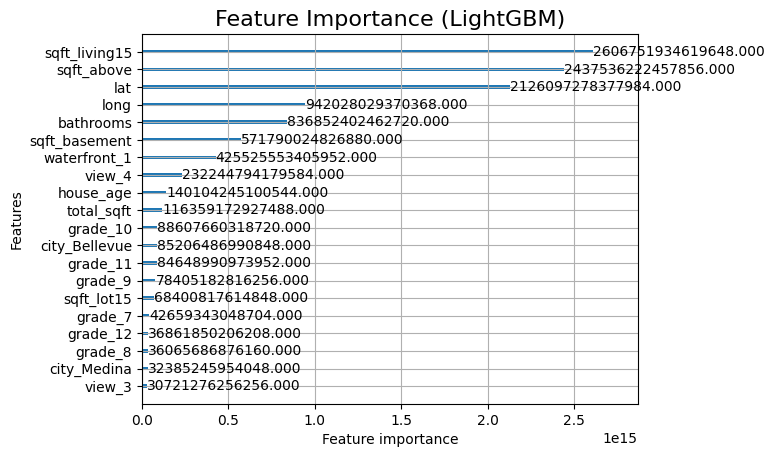

In [ ]:
feature_names = X_train.columns.tolist()


# Plot feature importance
lgb.plot_importance(lgb_model, max_num_features=20, importance_type='gain')
plt.title('Feature Importance (LightGBM)', fontsize=16)
plt.show()


Based on the results from featrue importance, variables like square footage, locations, view, number of bathrooms and  bedrooms, Waterfront status, and conditions of the houses  are significant factors for predicting the price of a house. These features align with common intuitions about factors that influence housing prices.

#  Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test)
print(f'MLP RMSE: {mean_squared_error(y_test, y_pred_mlp, squared=False)}')
print(f'MLP R^2: {r2_score(y_test, y_pred_mlp)}')

MLP RMSE: 158434.88150364935
MLP R^2: 0.8339584761280788


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


This is my first time using neural network for any project and it was intersting to learn about it. The Multilayer Perceptron performed well, a little better than linear regression yet not as compeitive as LightGBM

# LIME

LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1524e271616176bbadb3ba4cd06bed974707c494b974dfa2c2fa1a521fe48a2f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#reference: https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

In [ ]:
# Reference: https://stackoverflow.com/questions/71646792/how-to-get-lime-predictions-vs-actual-predictions-in-a-dataframe
i = 0 # I just used the i = 0 to look at first row of prediction to see how does model predict.
# Get the explanation
exp = explainer.explain_instance(X_test.iloc[i].values, mlp_model.predict, num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

print(exp.as_list())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


[('grade_13 <= 0.00', -836346.7689680627), ('city_Medina <= 0.00', -748321.5087694396), ('grade_12 <= 0.00', -536447.6380844858), ('waterfront_1 <= 0.00', -459135.5157340679), ('city_Mercer Island <= 0.00', -351224.36951974465), ('grade_4 <= 0.00', 243433.50123608194), ('city_Bellevue <= 0.00', -232674.01160158427), ('grade_11 <= 0.00', -201262.7528309881), ('grade_5 <= 0.00', 133105.3668485409), ('city_Black Diamond <= 0.00', -127763.87422946483)]


In [ ]:
exp.as_list()

[('grade_13 <= 0.00', -836346.7689680627),
 ('city_Medina <= 0.00', -748321.5087694396),
 ('grade_12 <= 0.00', -536447.6380844858),
 ('waterfront_1 <= 0.00', -459135.5157340679),
 ('city_Mercer Island <= 0.00', -351224.36951974465),
 ('grade_4 <= 0.00', 243433.50123608194),
 ('city_Bellevue <= 0.00', -232674.01160158427),
 ('grade_11 <= 0.00', -201262.7528309881),
 ('grade_5 <= 0.00', 133105.3668485409),
 ('city_Black Diamond <= 0.00', -127763.87422946483)]

To enhance the interpretability of the MLP model, LIME (Local Interpretable Model-agnostic Explanations) been used. LIME as it is model-agnostic and provide a good individual prediction. Furthermore, LIME is quite simple and fast to use. From the result of first row, city_medina and others have negative impact to the pricing. And city_medina  contributes to decreasing the predicted price by about 748321.

# Model Comparision and Conclusion

<ipython-input-69-5ffd935c6fd9>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
<ipython-input-69-5ffd935c6fd9>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')


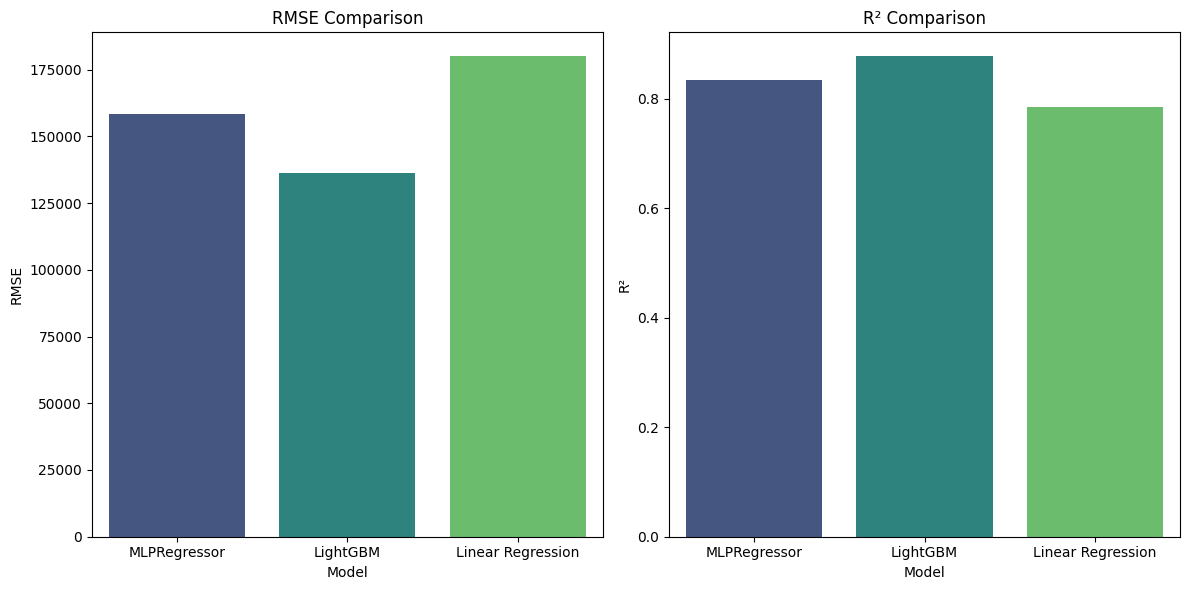

In [ ]:
mlp_rmse = mean_squared_error(y_test, y_pred_mlp, squared=False)
mlp_r2 = r2_score(y_test, y_pred_mlp)

lgb_rmse = mean_squared_error(y_test, y_pred_lgb, squared=False)
lgb_r2 = r2_score(y_test, y_pred_lgb)

lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)

# Prepare data for visualization
results = {
    'Model': ['MLPRegressor', 'LightGBM', 'Linear Regression'],
    'RMSE': [mlp_rmse, lgb_rmse, lr_rmse],
    'R²': [mlp_r2, lgb_r2, lr_r2]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))

# Create a bar plot for RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')

# Create a bar plot for R²
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title('R² Comparison')
plt.ylabel('R²')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

Conclusion: As MLP is a more complex model, it does perform better than linear regression yet not as good as LightGBM for this dataset. The reason why MLP is not the best performer might be the size of dataset is quite small and number of variables in the dataset are somewhat limited. Based on the graph above, I would conclude that LightGBM perform the best between 3 models as it has the lowest RMSE of just over 125000 and more than 87% of R-squared, which means that LightGBM model can capture more than 87% of variance in housing prices. If I have access to a bigger dataset and include more variables, I think that MLP would perform much better.